In [33]:
#this program computes the probability distribution in x for a particle in an infinite square well at temperature T
#I will use the variable y = x/L.
#This means the distribution function is P(y) = sum_n prob(n) 2 sin^2(n pi y) for 0<y<1

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt

#define pi
pi = 2.0*np.asin(1.0)

#the energies of the infinite square well are e1 n^2 with e1 = h^2/(8 M L^2)
#chi = 8 M L^2/(beta h^2) is a scaled temperature
chi = 100.0
#estimate the maximum number of l needed
nmaxflt = 6.0*np.sqrt(chi)
nmax = int(nmaxflt)
print(nmax)
#prob will be the probability to be in state n
prob = np.empty(nmax)
nval = np.empty(nmax)

#fill the values without the 1/Z term and compute the partition function
partfun = 0.0
n = 0
while n < nmax:
    nval[n] = 1.0*(n+1)
    prob[n] = np.exp(-(n+1)*(n+1)/chi)
    partfun += prob[n]
    n+=1

pi = 2.0*np.asin(1.0)
#compute an approximation to the partion function
approxz = 0.5*np.sqrt(pi*chi)-0.5
#print out the partion function and the approximation to it
print('Z =',partfun,approxz)
#include the partition function to convert to probability
n=0
while n < nmax:
    prob[n] = np.exp(-(n+1)*(n+1)/chi)/partfun
    n+=1

#now calculate the probability distribution function in y
numy = 501
dy = 1.0/(numy-1)
#pdis will hold the position distribution
pdis = np.empty(numy)
yval = np.empty(numy)
iy=0
while iy < numy:
    yval[iy] = iy*dy
    sumn = 0.0
    n=0
    while n < nmax:
        psi=np.sin(pi*yval[iy]*(n+1))
        sumn += psi*psi*prob[n]*2.0
        n+=1
    pdis[iy] = sumn
    iy+=1


60
Z = 8.362269254527572 8.36226925452758


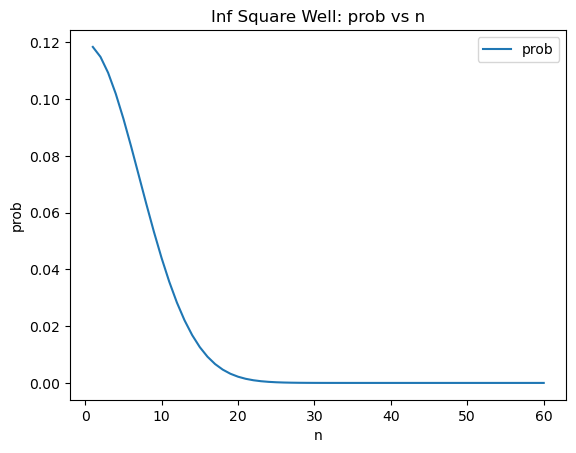

In [34]:
plt.plot(nval,prob,label='prob')
plt.legend()
plt.title('Inf Square Well: prob vs n')
plt.xlabel('n')
plt.ylabel('prob')
plt.show()

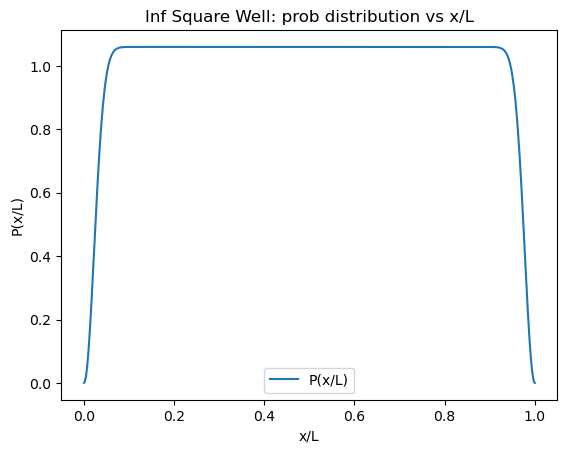

In [35]:
plt.plot(yval,pdis,label='P(x/L)')
plt.legend()
plt.title('Inf Square Well: prob distribution vs x/L')
plt.xlabel('x/L')
plt.ylabel('P(x/L)')
plt.show()